In [1]:
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
batch_size = 10
epochs = 10
num_classes = 10

In [3]:
# データの読み込み
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 正規化
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [4]:
model = Sequential()

# 1層目
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2層目
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 出力層
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

print(model.summary())

W0108 13:35:26.695518 140736235160512 deprecation_wrapper.py:119] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0108 13:35:26.716319 140736235160512 deprecation_wrapper.py:119] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0108 13:35:26.719600 140736235160512 deprecation_wrapper.py:119] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0108 13:35:26.754153 140736235160512 deprecation_wrapper.py:119] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0108 1

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [5]:
hist = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))

W0108 13:35:27.047899 140736235160512 deprecation.py:323] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 312s 6ms/step - loss: 1.5114 - acc: 0.4515 - val_loss: 1.1732 - val_acc: 0.5796
Epoch 2/10
50000/50000 [==============================] - 297s 6ms/step - loss: 1.1858 - acc: 0.5795 - val_loss: 0.9861 - val_acc: 0.6574
Epoch 3/10
50000/50000 [==============================] - 306s 6ms/step - loss: 1.0649 - acc: 0.6276 - val_loss: 0.9201 - val_acc: 0.6766
Epoch 4/10
50000/50000 [==============================] - 324s 6ms/step - loss: 0.9852 - acc: 0.6535 - val_loss: 0.8740 - val_acc: 0.6930
Epoch 5/10
50000/50000 [==============================] - 335s 7ms/step - loss: 0.9436 - acc: 0.6700 - val_loss: 0.8577 - val_acc: 0.6982
Epoch 6/10
50000/50000 [==============================] - 306s 6ms/step - loss: 0.9141 - acc: 0.6807 - val_loss: 0.8140 - val_acc: 0.7176
Epoch 7/10
50000/50000 [==============================] - 297s 6ms/step - loss: 0.8904 - acc: 0.6894 - val_loss: 0.8122 - 

In [6]:
model_json_str = model.to_json()
open('cifar10_10_model.json', 'w').write(model_json_str)
model.save_weights('cifar10_10_weights.h5')
print('model saved')

model saved


In [7]:
score = model.evaluate(x_test, y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7903852193832398
Test accuracy: 0.7325


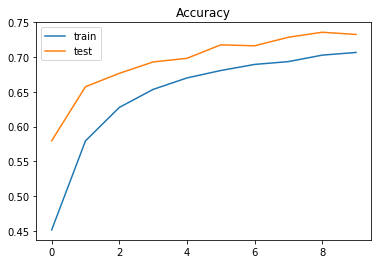

<Figure size 432x288 with 0 Axes>

In [8]:
# 正解率の推移をプロット
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("cifar10_10_acc.png")

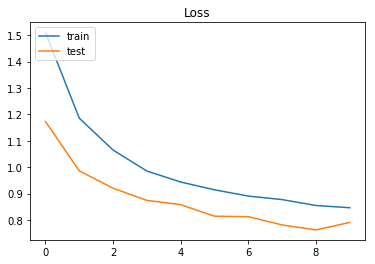

<Figure size 432x288 with 0 Axes>

In [9]:
plt.cla()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("cifar10_10_loss.png")